<a href="https://colab.research.google.com/github/tirthasheshpatel/semester6_practicals/blob/main/dl/Practical-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, Dropout, MaxPool2D, Lambda, Reshape, Conv2DTranspose
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train = X_train / 255.
X_test  = X_test  / 255.

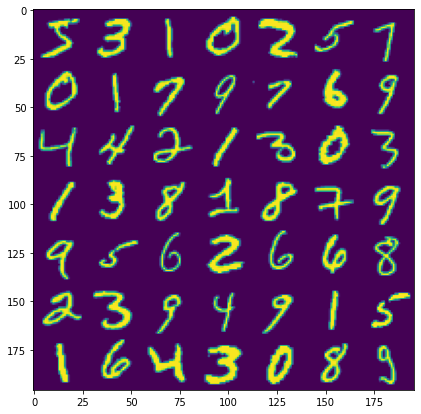

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
X_to_plot = X_train[:49, ...]
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax.imshow(X_to_plot)

In [5]:
ann_model = Sequential()
ann_model.add(Input([28,28]))
ann_model.add(Flatten())
ann_model.add(Dense(units=256, activation='relu'))
ann_model.add(Dense(units=128, activation='relu'))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dense(units=128, activation='relu'))
ann_model.add(Dense(units=256, activation='relu'))
ann_model.add(Dense(units=28*28, activation='sigmoid'))
ann_model.add(Reshape([28,28]))

In [6]:
ann_model.compile(loss='mse',
                 optimizer='adam',
                 metrics=['mse'])

In [7]:
history = ann_model.fit(X_train, X_train,
                       validation_data=(X_test, X_test),
                       epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0111 - val_mse: 0.0111


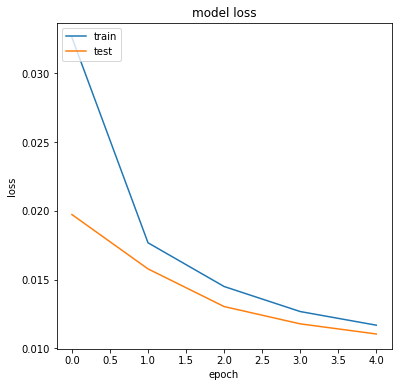

In [8]:
# summarize history for accuracy
fig, ax = plt.subplots(figsize=(6, 6))
# summarize history for loss
ax.plot(history.history['loss']);
ax.plot(history.history['val_loss']);
ax.set_title('model loss');
ax.set_ylabel('loss');
ax.set_xlabel('epoch');
ax.legend(['train', 'test'], loc='upper left');

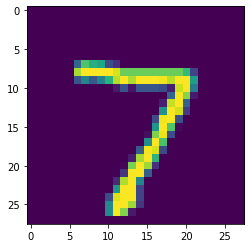

In [9]:
plt.imshow(X_test[0])

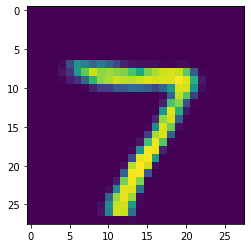

In [10]:
plt.imshow(ann_model.predict(X_test[:1, ...]).reshape(28,28))

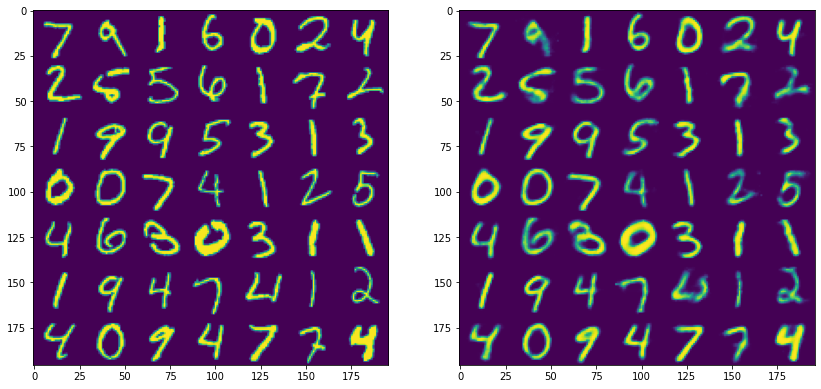

In [11]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 28), nrows=1, ncols=2)
X_to_plot = X_test[:49, ...]
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax1.imshow(X_to_plot)
X_to_plot = ann_model.predict(X_test[:49, ...])
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax2.imshow(X_to_plot)

In [12]:
cnn_model = Sequential([
        Reshape([28,28,1]),
        Conv2D(16, 5, 1, activation='relu'),                  # 16 x 24 x 24
        Conv2D(32, 5, 1, activation='relu'),                  # 32 x 20 x 20
        MaxPool2D(2, 2),                                      # 32 x 10 x 10
        Conv2D(64, 5, 1, activation='relu'),                  # 64 x 6 x 6
        Dropout(0.25),
        Conv2D(128, 5, 1, activation='relu'),                 # 128 x 2 x 2
        Dropout(0.15),
        Flatten(),
        Dense(64),                                            # 64 ==> Bottleneck
        Dense(128*2*2, activation='relu'),                    # 128 * 2 * 2
        Reshape([2, 2, 128]),                                 # 128 x 2 x 2
        Conv2DTranspose(64, 5, 1, activation='relu'),         # 64 x 6 x 6
        Conv2DTranspose(32, 5, 1, activation='relu'),         # 32 x 10 x 10
        Conv2DTranspose(32, 11, 1, activation='relu'),        # 32 x 20 x 20
        Conv2DTranspose(16, 5, 1, activation='relu'),         # 16 x 24 x 24
        Conv2DTranspose(1, 5, 1, activation='sigmoid'),       # 1 x 28 x 28
        Reshape([28,28])
])

In [13]:
cnn_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mse'])

In [14]:
history = cnn_model.fit(X_train, X_train,
                        validation_data=(X_test, X_test),
                        epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0061 - val_mse: 0.0061


In [15]:
encoder = cnn_model.layers[:10]
decoder = cnn_model.layers[10:]

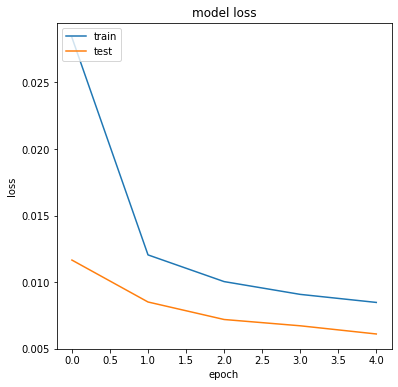

In [16]:
# summarize history for accuracy
fig, ax = plt.subplots(figsize=(6, 6))
# summarize history for loss
ax.plot(history.history['loss']);
ax.plot(history.history['val_loss']);
ax.set_title('model loss');
ax.set_ylabel('loss');
ax.set_xlabel('epoch');
ax.legend(['train', 'test'], loc='upper left');

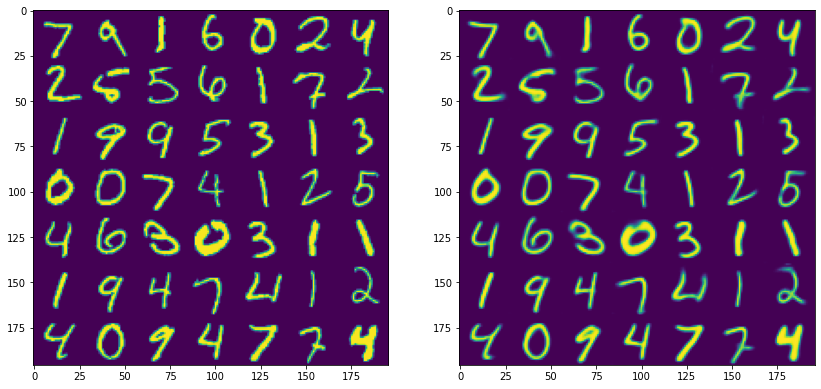

In [17]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 28), nrows=1, ncols=2)
X_to_plot = X_test[:49, ...]
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax1.imshow(X_to_plot)
X_to_plot = cnn_model.predict(X_test[:49, ...])
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax2.imshow(X_to_plot)